Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Iga Miller"

---

# 0. Wstęp
W trakcie pierwszego laboratorium zbadamy kilka możliwości ewaluacji wyuczonych reprezentacji. Będzie to podstawą dalszej pracy z różnymi modelami uczenia reprezentacji.

Często spotykanym rozwiązaniem, stosowanym również w trakcie badań modelu i jego wstępnej ewaluacji, jest **wizualizacja ukrytej przestrzeni (reprezentacji)** na płaszczyźnie dwu-wymiarowej. Czasami można się również spotkać z wizualizacją w przestrzeni trójwymiarowej, jednak takie rozwiązanie wymaga interaktywnego widoku. Stąd też w literaturze spotykamy tylko dwu-wymiarowe rzutowania.

Wizualizacje są przygotowane w taki sposób, aby każdy punkt na wykresie odpowiadał pojedynczej próbce danych, natomiast kolor jest zgodny z klasą danej próbki.

Istnieje wiele metod pozwalających na **redukcję wymiarowości** i sprowadzenia wektorów reprezentacji z wysoko-wymiarowej przestrzeni ukrytej do wektorów dwu-wymiarowych. Można je podzielić na:
- metody liniowe:
    * PCA - Principal Component Analysis
    * FA - Factor Analysis
    * LDA - Linear Discriminant Analysis
    * SVD - (Truncated) Singular Value Decomposition
- metody nie-liniowe:
    * Kernel PCA
    * t-SNE - t-distributed Stochastic Neighbor Embedding
    * UMAP - Uniform Manifold Approximation and Projection
    * MDS - Multidimensional Scaling
    * Isomap - Isometric mapping

Wybór danej metody redukcji wymiarowości powinien być uzależniony od konkretnego typu danych. **Źle dobrana metoda redukcji wymiarowości może doprowadzić do błędnych wniosków o jakości uzyskanej reprezentacji!**

**Materiały dodatkowe:**
- https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
- https://www.sciencedirect.com/science/article/pii/S156625351930377X

# 1. Zbiór danych Swiss Roll
Zbadamy jakość działania wybranych metod redukcji wymiarowości na przykładzie zbioru Swiss Roll. Jest to zbiór danych, w którym punkty są ułożone w postaci zawiniętego prostokąta. Zbiór ten ze względu na swoją krzywiznę może być wyzwaniem dla niektórych metod redukcji wymiarowości.

In [1]:
from sklearn.datasets import make_swiss_roll


swiss_roll_X, swiss_roll_y = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

[Text(0.5, 0.92, 'Zbiór danych Swiss Roll')]

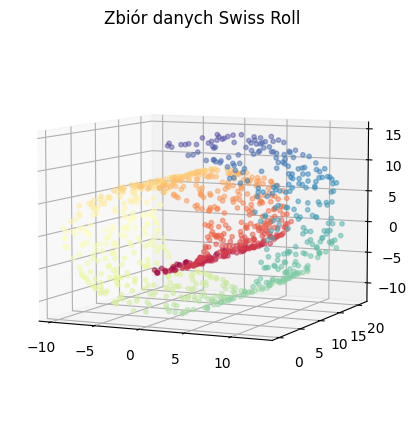

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D


ax = plt.figure(figsize=(15, 5)).add_subplot(projection='3d')

ax.view_init(7, -65)

ax.scatter(
    xs=swiss_roll_X[:, 0],
    ys=swiss_roll_X[:, 1],
    zs=swiss_roll_X[:, 2],
    c=swiss_roll_y,
    cmap="Spectral",
    s=10, 
    alpha=0.5,
)
ax.set(title="Zbiór danych Swiss Roll")

## Zadanie 1.1 (2.5 pkt)
Zbadamy następujące metody redukcji wymiarowości: PCA, MDS, Isomap, t-SNE oraz UMAP. Zaimplementuj poniżej zdefiniowane funkcje, które zastosują podane metody na danych wejściowych `x` zwracając dla każdego punktu jego dwu-wymiarowe rzutowanie. Pamiętaj o przekazaniu dodatkowych argumentów (hiperparameterów) do konstruktora metody (dla Isomap, t-SNE oraz UMAP).

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, TSNE
from umap.umap_ import UMAP


def compute_PCA(x: np.ndarray) -> np.ndarray:
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(x)
    return x_2d


def compute_MDS(x: np.ndarray) -> np.ndarray:
    mds = MDS(n_components=2, normalized_stress='auto')
    x_2d = mds.fit_transform(x)
    return x_2d


def compute_Isomap(x: np.ndarray, n_neighbors: int = 30) -> np.ndarray:
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
    x_2d = isomap.fit_transform(x)
    return x_2d


def compute_tSNE(x: np.ndarray, perplexity: int = 50) -> np.ndarray:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    x_2d = tsne.fit_transform(x)
    return x_2d


def compute_UMAP(x: np.ndarray, n_neighbors: int = 30, min_dist: float = 0.3) -> np.ndarray:
    reducer = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2)
    x_2d = reducer.fit_transform(x)
    return x_2d



In [13]:
methods = [
    ("PCA", compute_PCA),
    ("MDS", compute_MDS),
    ("Isomap", compute_Isomap),
    ("t-SNE", compute_tSNE),
    ("UMAP", compute_UMAP)
]

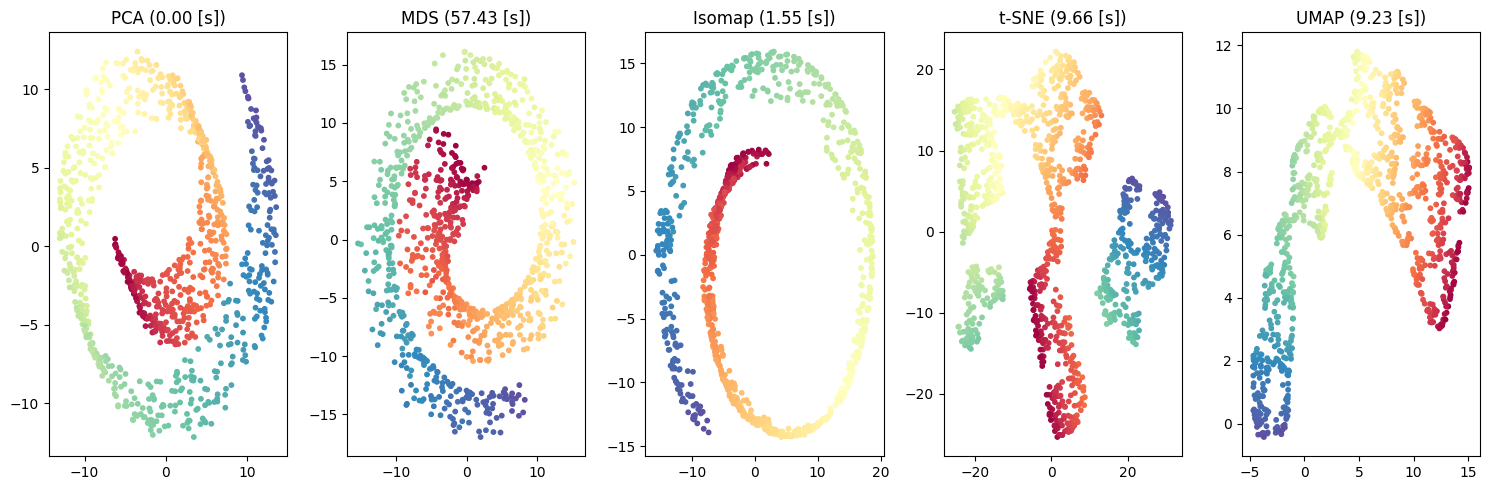

In [14]:
from time import perf_counter


fig, axs = plt.subplots(ncols=len(methods), figsize=(15, 5))


for ax, (name, compute_fn) in zip(axs.ravel(), methods):
    # Apply dimensionality reduction method and measure time
    start = perf_counter()
    z_2d = compute_fn(x=swiss_roll_X)
    end = perf_counter()
    
    # Plot 2-D projections
    ax.scatter(z_2d[:, 0], z_2d[:, 1], c=swiss_roll_y, cmap="Spectral", s=10)
    ax.set(title=f"{name} ({end - start:.2f} [s])")
    
    
fig.tight_layout()

## Zadanie 1.2 (0.25 pkt)
Która z metod twoim zdaniem zadziałała najlepiej? Uzasadnij.

Analizując wykresy można stwierdzić, że t-SNE i UMAP stworzyły najbardziej odrębne i dobrze oddzielone klastry. Świadczy to o tym, że te metody były w stanie uchwycić podstawową strukturę danych w sposób, w przeciwieństwie do innych metod. t-SNE i UMAP to nieliniowe techniki wizualizacji danych wielowymiarowych. wielowymiarowych. PCA to technika liniowa, która jest przydatna do identyfikacji najważniejszych wymiarów, które wyjaśniają większość zmienności w danych. MDS i Isomap są również przydatnymi technikami wizualizacji danych wielowymiarowych i zachowania relacji odległości między punktami danych, ale mogą nie działać dobrze w przypadku danych o złożonych relacjach nieliniowych.Jednak porównójąc ze sobą t-SNE i UMAP wyraźnie widać, że UMAP zachował spójność, natomiast w t-sne nastąpiło rozdzielenie punktów zielonych. Dlatego po analizie mozna dojsć do wniosku, że w przypadku tych danych najodpowiednieszym modelem jest UMAP.


# 2. Zbiór danych "blobs"
Następnie sprawdzimy zbiór, w którym instancje są opisane przez wysoko-wymiarowe wektory cech - wykorzystamy próbkowanie z wielowymiarowych rozkładów normalnych (funkcja `make_blobs`).

In [15]:
from sklearn.datasets import make_blobs


blobs_X, blobs_y = make_blobs(n_samples=1000, n_features=128, centers=5, random_state=42)

C:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr

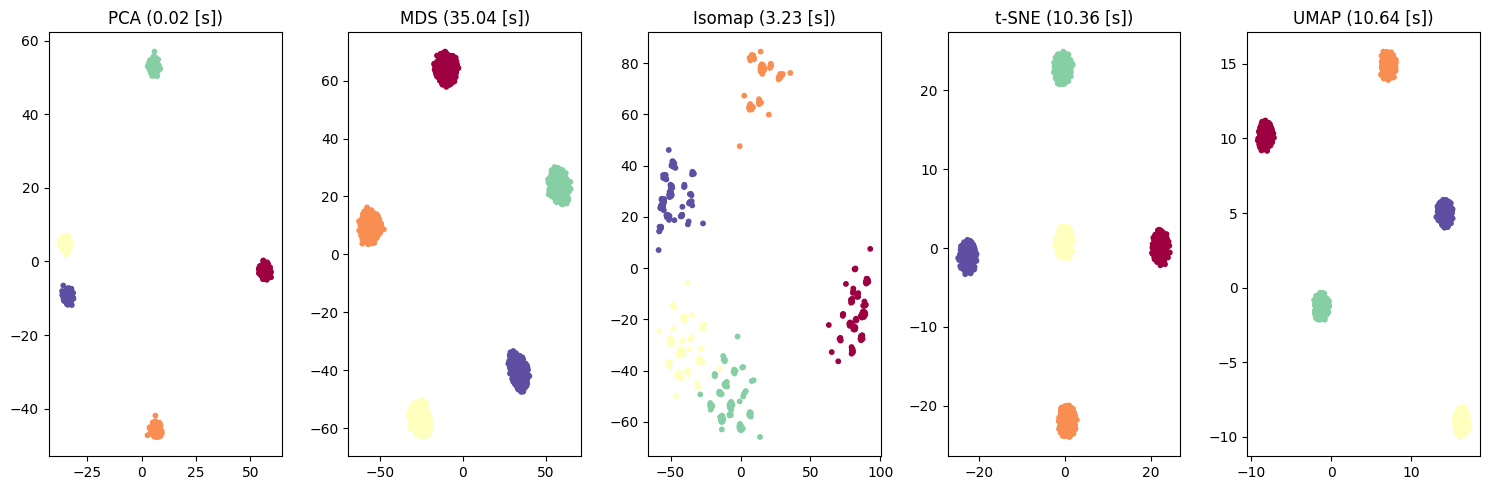

In [16]:
fig, axs = plt.subplots(ncols=len(methods), figsize=(15, 5))


for ax, (name, compute_fn) in zip(axs.ravel(), methods):
    # Apply dimensionality reduction method and measure time
    start = perf_counter()
    z_2d = compute_fn(x=blobs_X)
    end = perf_counter()
    
    # Plot 2-D projections
    ax.scatter(z_2d[:, 0], z_2d[:, 1], c=blobs_y, cmap="Spectral", s=10)
    ax.set(title=f"{name} ({end - start:.2f} [s])")
    
    
fig.tight_layout()

## Zadanie 2.1 (0.25 pkt)
Jak zachowują się zbadane metody w porównaniu do zbioru Swiss Roll?

W tym przypadku widać, że wszystkie metody poradziły sobie z ujawnieniem klastrów i wzorcow. Isomap poradził sobie najgorzej, ponieważ grupy punktów są bardziej rozproszone niż w innych przypadkach. W przypadku tego zbioru klastry są odzielone od siebie, a nie tak jak w przypadku swiss_roll, gdzie w idealnym przypadku dostalibyśmy prostokąt. Tutaj widać rozproszenie. Ponieważ make_blobs generuje syntetyczne dane o znanej strukturze klastrów, PCA może być w tym przypadku dobrym wyborem, ponieważ może pomóc zidentyfikować kierunki maksymalnej wariancji danych.